## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [134]:
# Your code here - remember to use markdown cells for comments as well!

In [61]:
#Importing necessary libraries
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
from sklearn.preprocessing import MultiLabelBinarizer # converts a column containing lists of labels (e.g., ["Action", "Comedy"]) into one-hot / dummy columns
import seaborn as sns
import matplotlib.pyplot as plt

In [62]:
#Loading dataset
conn = sqlite3.connect('zippedData/im.db/im.db')

In [63]:
#check tables
pd.read_sql(""" 
SELECT *
    FROM sqlite_master
    """
, conn
)

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


In [64]:
#reading contents of table movie basics
movie_basics= pd.read_sql(""" 
SELECT *
FROM movie_basics
    """
, conn
)
movie_basics.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [65]:
#reading contents of table movie ratings
movie_ratings= pd.read_sql(""" 
SELECT *
FROM movie_ratings
    """
, conn
)
movie_ratings

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


Data understanding summary for `movie_basics` and `movie_ratings` datasets:
---
### **movie_basics**
- **Purpose:** Contains metadata about movies.
- **Key Columns:**
  - `movie_id`: Unique identifier for each movie.
  - `primary_title`: Main title of the movie.
  - `original_title`: Original title (may differ for international releases).
  - `start_year`: Year the movie was released.
  - `runtime_minutes`: Duration of the movie.
  - `genres`: Movie genres (can be multiple, separated by commas).
- **Usage:** Useful for exploring movie characteristics, genres, and trends over time.
---
### **movie_ratings**
- **Purpose:** Contains user ratings for movies.
- **Key Columns:**
  - `movie_id`: Foreign key linking to `movie_basics`.
  - `averagerating`: Average user rating for the movie.
  - `numvotes`: Number of user votes.
- **Usage:** Useful for analyzing movie popularity, rating distributions, and identifying highly rated or controversial movies.
---
- **Join on `movie_id`** to combine metadata and ratings for deeper analysis (e.g., how genre or runtime affects ratings).

In [66]:
#Join movie_basics and movie_ratings
imdb= pd.read_sql(""" 
SELECT *
    FROM movie_ratings
    LEFT JOIN movie_basics
    USING(movie_id)
    """
, conn
)
imdb.head()

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,tt10356526,8.3,31,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance
1,tt10384606,8.9,559,Borderless,Borderless,2019,87.0,Documentary
2,tt1042974,6.4,20,Just Inès,Just Inès,2010,90.0,Drama
3,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy"
4,tt1060240,6.5,21,Até Onde?,Até Onde?,2011,73.0,"Mystery,Thriller"


In [67]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   averagerating    73856 non-null  float64
 2   numvotes         73856 non-null  int64  
 3   primary_title    73856 non-null  object 
 4   original_title   73856 non-null  object 
 5   start_year       73856 non-null  int64  
 6   runtime_minutes  66236 non-null  float64
 7   genres           73052 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


In [68]:
percentage_missing = imdb.isnull().sum() * 100/len(imdb)
percentage_missing

movie_id            0.000000
averagerating       0.000000
numvotes            0.000000
primary_title       0.000000
original_title      0.000000
start_year          0.000000
runtime_minutes    10.317374
genres              1.088605
dtype: float64

In [69]:
#Drop missing values
imdb = imdb.dropna(subset=('runtime_minutes','genres'))
imdb.reset_index(drop=True)
imdb.head()

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,tt10356526,8.3,31,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance
1,tt10384606,8.9,559,Borderless,Borderless,2019,87.0,Documentary
2,tt1042974,6.4,20,Just Inès,Just Inès,2010,90.0,Drama
3,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy"
4,tt1060240,6.5,21,Até Onde?,Até Onde?,2011,73.0,"Mystery,Thriller"


In [70]:
budgets_df = pd.read_csv('zippedData/tn.movie_budgets.csv.gz', compression='gzip')
budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [71]:
gross_df = pd.read_csv('zippedData/bom.movie_gross.csv.gz', compression='gzip')
gross_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [72]:
# Merge with budgets_df on different column names
merged_df = pd.merge(
    imdb,
    budgets_df,
    left_on='primary_title',       # key in merged_df
    right_on='movie',       # key in budgets_df
    how='inner'
)

# Merge with gross_df on different column names
merged_df = pd.merge(
    merged_df,
    gross_df,
    left_on='movie',          # key in merged_df
    right_on='title',    # key in gross_df
    how='inner'
)
merged_df.head()

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres,id,release_date,movie,production_budget,domestic_gross_x,worldwide_gross,title,studio,domestic_gross_y,foreign_gross,year
0,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy",42,"Jan 10, 2014",The Legend of Hercules,"$70,000,000","$18,848,538","$58,953,319",The Legend of Hercules,LG/S,18800000.0,42400000,2014
1,tt1171222,5.1,8296,Baggage Claim,Baggage Claim,2013,96.0,Comedy,38,"Sep 27, 2013",Baggage Claim,"$8,500,000","$21,569,509","$22,885,836",Baggage Claim,FoxS,21600000.0,887000,2013
2,tt1210166,7.6,326657,Moneyball,Moneyball,2011,133.0,"Biography,Drama,Sport",15,"Sep 23, 2011",Moneyball,"$50,000,000","$75,605,492","$111,300,835",Moneyball,Sony,75600000.0,34600000,2011
3,tt1212419,6.5,87288,Hereafter,Hereafter,2010,129.0,"Drama,Fantasy,Romance",61,"Oct 15, 2010",Hereafter,"$50,000,000","$32,746,941","$108,660,270",Hereafter,WB,32700000.0,72500000,2010
4,tt1232829,7.2,477771,21 Jump Street,21 Jump Street,2012,109.0,"Action,Comedy,Crime",44,"Mar 16, 2012",21 Jump Street,"$42,000,000","$138,447,667","$202,812,429",21 Jump Street,Sony,138400000.0,63100000,2012


In [73]:
merged_df.drop(['start_year', 'original_title','id','primary_title','movie','year'], axis=1, inplace=True)
merged_df.head()

,movie_id,averagerating,numvotes,runtime_minutes,genres,release_date,production_budget,domestic_gross_x,worldwide_gross,title,studio,domestic_gross_y,foreign_gross
0,tt1043726,4.2,50352,99.0,"Action,Adventure,Fantasy","Jan 10, 2014","$70,000,000","$18,848,538","$58,953,319",The Legend of Hercules,LG/S,18800000.0,42400000
1,tt1171222,5.1,8296,96.0,Comedy,"Sep 27, 2013","$8,500,000","$21,569,509","$22,885,836",Baggage Claim,FoxS,21600000.0,887000
2,tt1210166,7.6,326657,133.0,"Biography,Drama,Sport","Sep 23, 2011","$50,000,000","$75,605,492","$111,300,835",Moneyball,Sony,75600000.0,34600000
3,tt1212419,6.5,87288,129.0,"Drama,Fantasy,Romance","Oct 15, 2010","$50,000,000","$32,746,941","$108,660,270",Hereafter,WB,32700000.0,72500000
4,tt1232829,7.2,477771,109.0,"Action,Comedy,Crime","Mar 16, 2012","$42,000,000","$138,447,667","$202,812,429",21 Jump Street,Sony,138400000.0,63100000


In [74]:
#Summary statistics for imdb dataset
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1379 entries, 0 to 1378
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie_id           1379 non-null   object 
 1   averagerating      1379 non-null   float64
 2   numvotes           1379 non-null   int64  
 3   runtime_minutes    1379 non-null   float64
 4   genres             1379 non-null   object 
 5   release_date       1379 non-null   object 
 6   production_budget  1379 non-null   object 
 7   domestic_gross_x   1379 non-null   object 
 8   worldwide_gross    1379 non-null   object 
 9   title              1379 non-null   object 
 10  studio             1379 non-null   object 
 11  domestic_gross_y   1378 non-null   float64
 12  foreign_gross      1182 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 140.2+ KB


In [75]:
percentage_missing = merged_df.isnull().sum() * 100/len(imdb)
percentage_missing

movie_id             0.000000
averagerating        0.000000
numvotes             0.000000
runtime_minutes      0.000000
genres               0.000000
release_date         0.000000
production_budget    0.000000
domestic_gross_x     0.000000
worldwide_gross      0.000000
title                0.000000
studio               0.000000
domestic_gross_y     0.001522
foreign_gross        0.299757
dtype: float64

In [76]:
#Summary statistics for imdb dataset
merged_df.describe()

,averagerating,numvotes,runtime_minutes,domestic_gross_y
count,1379.000000,1.379000e+03,1379.000000,1.378000e+03
mean,6.438724,1.161493e+05,107.296592,6.067686e+07
std,1.014421,1.651254e+05,19.714502,8.515963e+07
min,1.600000,5.000000e+00,3.000000,8.000000e+02
25%,5.900000,1.508050e+04,95.000000,7.250000e+06
50%,6.500000,6.030400e+04,105.000000,3.370000e+07
75%,7.100000,1.396090e+05,118.000000,7.390000e+07
max,9.200000,1.841066e+06,192.000000,7.001000e+08


In [77]:
merged_df.columns

Index(['movie_id', 'averagerating', 'numvotes', 'runtime_minutes', 'genres',
       'release_date', 'production_budget', 'domestic_gross_x',
       'worldwide_gross', 'title', 'studio', 'domestic_gross_y',
       'foreign_gross'],
      dtype='object')

In [78]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1379 entries, 0 to 1378
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie_id           1379 non-null   object 
 1   averagerating      1379 non-null   float64
 2   numvotes           1379 non-null   int64  
 3   runtime_minutes    1379 non-null   float64
 4   genres             1379 non-null   object 
 5   release_date       1379 non-null   object 
 6   production_budget  1379 non-null   object 
 7   domestic_gross_x   1379 non-null   object 
 8   worldwide_gross    1379 non-null   object 
 9   title              1379 non-null   object 
 10  studio             1379 non-null   object 
 11  domestic_gross_y   1378 non-null   float64
 12  foreign_gross      1182 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 140.2+ KB


**Further Data Cleaning and transformation**
1. release_date - Transform by creating two variables - Data and month columns, and group by seasons
2. production_budget - Remove the dollar sign
3. domestic_gross_x - Drop this and use domestic_gross_y
4. worldwide_gross - Drop dollar sign

In [79]:
#1. Transform the release_date by creating two variables - year and month columns, and group by seasons 
#  Make sure release_date is datetime
merged_df["release_date"] = pd.to_datetime(
    merged_df["release_date"],              
    errors="coerce"                          
)

#  Create year & month columns
merged_df["release_year"]  = merged_df["release_date"].dt.year
merged_df["release_month"] = merged_df["release_date"].dt.month   # 1–12

# Map month columns to season
# ─────────────────────────────────────────────
month_to_season = {
    12: "Winter",  1: "Winter",  2: "Winter",
     3: "Spring",  4: "Spring",  5: "Spring",
     6: "Summer",  7: "Summer",  8: "Summer",
     9: "Autumn", 10: "Autumn", 11: "Autumn",
}
merged_df["season"] = merged_df["release_month"].map(month_to_season)

In [80]:
merged_df.head()

,movie_id,averagerating,numvotes,runtime_minutes,genres,release_date,production_budget,domestic_gross_x,worldwide_gross,title,studio,domestic_gross_y,foreign_gross,release_year,release_month,season
0,tt1043726,4.2,50352,99.0,"Action,Adventure,Fantasy",2014-01-10,"$70,000,000","$18,848,538","$58,953,319",The Legend of Hercules,LG/S,18800000.0,42400000,2014,1,Winter
1,tt1171222,5.1,8296,96.0,Comedy,2013-09-27,"$8,500,000","$21,569,509","$22,885,836",Baggage Claim,FoxS,21600000.0,887000,2013,9,Autumn
2,tt1210166,7.6,326657,133.0,"Biography,Drama,Sport",2011-09-23,"$50,000,000","$75,605,492","$111,300,835",Moneyball,Sony,75600000.0,34600000,2011,9,Autumn
3,tt1212419,6.5,87288,129.0,"Drama,Fantasy,Romance",2010-10-15,"$50,000,000","$32,746,941","$108,660,270",Hereafter,WB,32700000.0,72500000,2010,10,Autumn
4,tt1232829,7.2,477771,109.0,"Action,Comedy,Crime",2012-03-16,"$42,000,000","$138,447,667","$202,812,429",21 Jump Street,Sony,138400000.0,63100000,2012,3,Spring


In [81]:
# Remove the dollar signs and variables  (and commas) in production_budget and worldwide_gross and convert the result to float
merged_df["production_budget"] = (
    merged_df["production_budget"]
          .replace('[$,]', '', regex=True) 
          .astype(float)                      
)

merged_df["worldwide_gross"] = (
    merged_df["worldwide_gross"]
          .replace('[$,]', '', regex=True)
          .astype(float)
)
merged_df["foreign_gross"] = (
    merged_df["worldwide_gross"]
          .replace('[$,]', '', regex=True)
          .astype(float)
)

In [82]:
# Drop the domestic_gross_x column – We consider the already cleaned variable domestic_gross_y
merged_df = merged_df.drop(columns="domestic_gross_x")    

In [83]:
merged_df.head(2)

,movie_id,averagerating,numvotes,runtime_minutes,genres,release_date,production_budget,worldwide_gross,title,studio,domestic_gross_y,foreign_gross,release_year,release_month,season
0,tt1043726,4.2,50352,99.0,"Action,Adventure,Fantasy",2014-01-10,70000000.0,58953319.0,The Legend of Hercules,LG/S,18800000.0,58953319.0,2014,1,Winter
1,tt1171222,5.1,8296,96.0,Comedy,2013-09-27,8500000.0,22885836.0,Baggage Claim,FoxS,21600000.0,22885836.0,2013,9,Autumn


In [84]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1379 entries, 0 to 1378
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   movie_id           1379 non-null   object        
 1   averagerating      1379 non-null   float64       
 2   numvotes           1379 non-null   int64         
 3   runtime_minutes    1379 non-null   float64       
 4   genres             1379 non-null   object        
 5   release_date       1379 non-null   datetime64[ns]
 6   production_budget  1379 non-null   float64       
 7   worldwide_gross    1379 non-null   float64       
 8   title              1379 non-null   object        
 9   studio             1379 non-null   object        
 10  domestic_gross_y   1378 non-null   float64       
 11  foreign_gross      1379 non-null   float64       
 12  release_year       1379 non-null   int32         
 13  release_month      1379 non-null   int32         
 14  season  

In [85]:
# Handle missing data by droping rows where domestic_gross_y is NaN

merged_df = merged_df.dropna(subset=['domestic_gross_y'])


# Handle missing data by filling missing such that foreign_gross = worldwide – domestic
missing_mask = merged_df['foreign_gross'].isna() & merged_df['worldwide_gross'].notna()

merged_df.loc[missing_mask, 'foreign_gross'] = (
    merged_df.loc[missing_mask, 'worldwide_gross']
    - merged_df.loc[missing_mask, 'domestic_gross_y'])

In [86]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1378 entries, 0 to 1378
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   movie_id           1378 non-null   object        
 1   averagerating      1378 non-null   float64       
 2   numvotes           1378 non-null   int64         
 3   runtime_minutes    1378 non-null   float64       
 4   genres             1378 non-null   object        
 5   release_date       1378 non-null   datetime64[ns]
 6   production_budget  1378 non-null   float64       
 7   worldwide_gross    1378 non-null   float64       
 8   title              1378 non-null   object        
 9   studio             1378 non-null   object        
 10  domestic_gross_y   1378 non-null   float64       
 11  foreign_gross      1378 non-null   float64       
 12  release_year       1378 non-null   int32         
 13  release_month      1378 non-null   int32         
 14  season       

In [87]:
# Create two new variables: Profitability and ROI (Return on Investment) 
# Profitability  = worldwide_gross – production_budget
merged_df["profitability"] = merged_df["worldwide_gross"] - merged_df["production_budget"]

# ROI = profitability ÷ production_budget
merged_df["ROI"] = merged_df["profitability"] / merged_df["production_budget"]

# Optional: inspect the result
merged_df[["production_budget", "worldwide_gross", "profitability", "ROI"]].head()

,production_budget,worldwide_gross,profitability,ROI
0,70000000.0,58953319.0,-11046681.0,-0.157810
1,8500000.0,22885836.0,14385836.0,1.692451
2,50000000.0,111300835.0,61300835.0,1.226017
3,50000000.0,108660270.0,58660270.0,1.173205
4,42000000.0,202812429.0,160812429.0,3.828867


In [88]:
merged_df.head()

,movie_id,averagerating,numvotes,runtime_minutes,genres,release_date,production_budget,worldwide_gross,title,studio,domestic_gross_y,foreign_gross,release_year,release_month,season,profitability,ROI
0,tt1043726,4.2,50352,99.0,"Action,Adventure,Fantasy",2014-01-10,70000000.0,58953319.0,The Legend of Hercules,LG/S,18800000.0,58953319.0,2014,1,Winter,-11046681.0,-0.157810
1,tt1171222,5.1,8296,96.0,Comedy,2013-09-27,8500000.0,22885836.0,Baggage Claim,FoxS,21600000.0,22885836.0,2013,9,Autumn,14385836.0,1.692451
2,tt1210166,7.6,326657,133.0,"Biography,Drama,Sport",2011-09-23,50000000.0,111300835.0,Moneyball,Sony,75600000.0,111300835.0,2011,9,Autumn,61300835.0,1.226017
3,tt1212419,6.5,87288,129.0,"Drama,Fantasy,Romance",2010-10-15,50000000.0,108660270.0,Hereafter,WB,32700000.0,108660270.0,2010,10,Autumn,58660270.0,1.173205
4,tt1232829,7.2,477771,109.0,"Action,Comedy,Crime",2012-03-16,42000000.0,202812429.0,21 Jump Street,Sony,138400000.0,202812429.0,2012,3,Spring,160812429.0,3.828867


In [89]:
# Split the comma-separated string into lists
merged_df["genres"] = (
    merged_df["genres"]
             .str.split(",")          # "Action,Comedy" → ["Action", "Comedy"]
             .apply(lambda lst: [g.strip() for g in lst])  # trim whitespace
)

# Create binary (dummy) columns for each genre
mlb = MultiLabelBinarizer()
genre_dummies = pd.DataFrame(
    mlb.fit_transform(merged_df["genres"]),
    columns=mlb.classes_,
    index=merged_df.index
)

# Join back to original DataFrame
merged_df = merged_df.join(genre_dummies)

# Optional: inspect the result
print(merged_df.iloc[:5, :10])  # first 5 rows, first


    movie_id  averagerating  numvotes  runtime_minutes  \
0  tt1043726            4.2     50352             99.0   
1  tt1171222            5.1      8296             96.0   
2  tt1210166            7.6    326657            133.0   
3  tt1212419            6.5     87288            129.0   
4  tt1232829            7.2    477771            109.0   

                         genres release_date  production_budget  \
0  [Action, Adventure, Fantasy]   2014-01-10         70000000.0   
1                      [Comedy]   2013-09-27          8500000.0   
2     [Biography, Drama, Sport]   2011-09-23         50000000.0   
3     [Drama, Fantasy, Romance]   2010-10-15         50000000.0   
4       [Action, Comedy, Crime]   2012-03-16         42000000.0   

   worldwide_gross                   title studio  
0       58953319.0  The Legend of Hercules   LG/S  
1       22885836.0           Baggage Claim   FoxS  
2      111300835.0               Moneyball   Sony  
3      108660270.0               Hereaft

In [90]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1378 entries, 0 to 1378
Data columns (total 39 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   movie_id           1378 non-null   object        
 1   averagerating      1378 non-null   float64       
 2   numvotes           1378 non-null   int64         
 3   runtime_minutes    1378 non-null   float64       
 4   genres             1378 non-null   object        
 5   release_date       1378 non-null   datetime64[ns]
 6   production_budget  1378 non-null   float64       
 7   worldwide_gross    1378 non-null   float64       
 8   title              1378 non-null   object        
 9   studio             1378 non-null   object        
 10  domestic_gross_y   1378 non-null   float64       
 11  foreign_gross      1378 non-null   float64       
 12  release_year       1378 non-null   int32         
 13  release_month      1378 non-null   int32         
 14  season       

## 3. Data Analysis

In [91]:
merged_df.head()

,movie_id,averagerating,numvotes,runtime_minutes,genres,release_date,production_budget,worldwide_gross,title,studio,...,Music,Musical,Mystery,News,Romance,Sci-Fi,Sport,Thriller,War,Western
0,tt1043726,4.2,50352,99.0,"[Action, Adventure, Fantasy]",2014-01-10,70000000.0,58953319.0,The Legend of Hercules,LG/S,...,0,0,0,0,0,0,0,0,0,0
1,tt1171222,5.1,8296,96.0,[Comedy],2013-09-27,8500000.0,22885836.0,Baggage Claim,FoxS,...,0,0,0,0,0,0,0,0,0,0
2,tt1210166,7.6,326657,133.0,"[Biography, Drama, Sport]",2011-09-23,50000000.0,111300835.0,Moneyball,Sony,...,0,0,0,0,0,0,1,0,0,0
3,tt1212419,6.5,87288,129.0,"[Drama, Fantasy, Romance]",2010-10-15,50000000.0,108660270.0,Hereafter,WB,...,0,0,0,0,1,0,0,0,0,0
4,tt1232829,7.2,477771,109.0,"[Action, Comedy, Crime]",2012-03-16,42000000.0,202812429.0,21 Jump Street,Sony,...,0,0,0,0,0,0,0,0,0,0


#### 3.1 Working with genres column and related columns 

In [92]:
# Perform basic frequency analysis
genre_counts = genre_dummies.sum().sort_values(ascending=False)
print(genre_counts)
# This gives the total mentions across the datasets

Drama          717
Comedy         449
Action         380
Adventure      303
Thriller       238
Crime          204
Romance        178
Horror         147
Biography      125
Mystery        111
Sci-Fi         111
Fantasy        102
Animation       89
Family          74
History         45
Documentary     45
Music           40
Sport           30
War             13
Western          8
Musical          5
News             2
dtype: int64


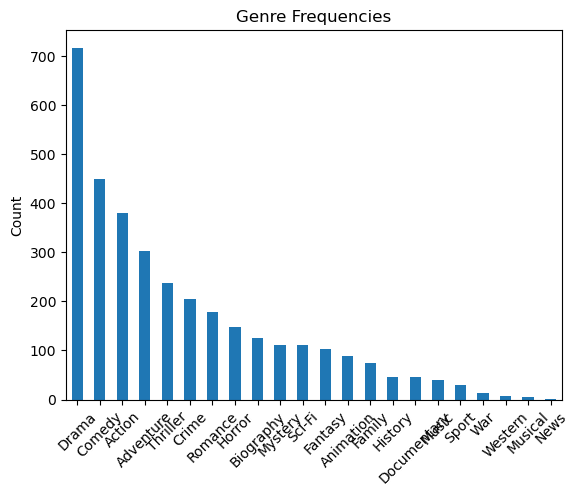

In [93]:
# Visual display of frequencies - bar plot
genre_counts.plot(kind='bar')
plt.title('Genre Frequencies')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [94]:
#Extract top 10 genres
top_genre = genre_dummies.sum().sort_values(ascending=False).head(10).index
# Filter the genre dummies to top 
top_genre_dummies = genre_dummies[top_genre]

In [95]:
# Create co-occurance matrix
co_occurrence = top_genre_dummies.T.dot(top_genre_dummies)

# Set diagonal to 0 (self-co-occurrence is not interesting)
#for genre in top_genre:
#    co_occurrence.at[genre, genre] = 0
co_occurrence

,Drama,Comedy,Action,Adventure,Thriller,Crime,Romance,Horror,Biography,Mystery
Drama,717,167,105,58,96,110,126,35,112,53
Comedy,167,449,69,115,3,54,100,11,23,4
Action,105,69,380,163,80,91,7,22,10,13
Adventure,58,115,163,303,15,14,4,5,8,3
Thriller,96,3,80,15,238,49,5,58,7,51
Crime,110,54,91,14,49,204,3,10,16,21
Romance,126,100,7,4,5,3,178,2,6,3
Horror,35,11,22,5,58,10,2,147,0,49
Biography,112,23,10,8,7,16,6,0,125,0
Mystery,53,4,13,3,51,21,3,49,0,111


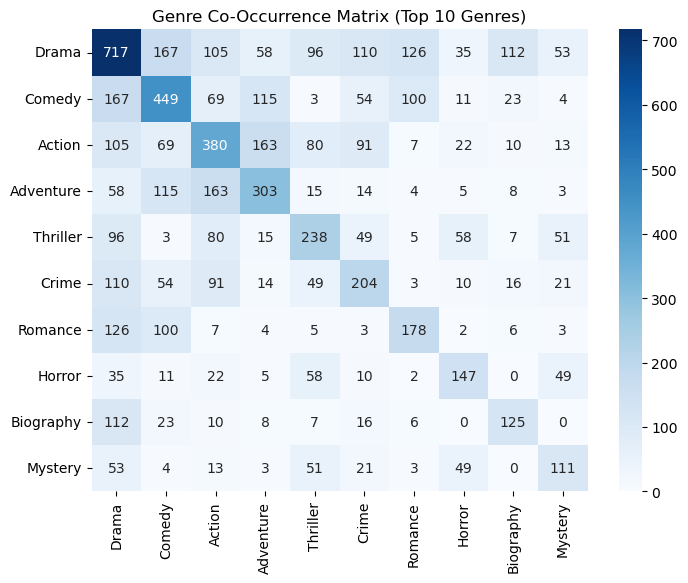

In [96]:
plt.figure(figsize=(8,6))
sns.heatmap(co_occurrence, annot=True, fmt='d', cmap='Blues')
plt.title('Genre Co-Occurrence Matrix (Top 10 Genres)')
plt.show()

#### 3.2 Compute rating and financial performance metrics
1. Average rating
2. Cost
3. Revenue
4. Profitability
5. Return on Investment

In [101]:
results = []

for genre in top_genre:
    subset = merged_df[merged_df[genre] == 1]
    results.append({
        'genre': genre,
        'average_rating': subset['averagerating'].mean(),
        'average_production_cost': subset['production_budget'].mean(),
        'average_wwrevenue': subset['worldwide_gross'].mean(),
        'average_drevenue': subset['domestic_gross_y'].mean(),
        'average_frevenue': subset['foreign_gross'].mean(),
        'average_profit': subset['profitability'].mean(),
        'average_roi': subset['ROI'].mean()
    })

performance_df = pd.DataFrame(results)

In [102]:
performance_df

,genre,average_rating,average_production_cost,average_wwrevenue,average_drevenue,average_frevenue,average_profit,average_roi
0,Drama,6.659693,2.788880e+07,8.049124e+07,3.616147e+07,8.049124e+07,5.260244e+07,2.669334
1,Comedy,6.327617,4.183869e+07,1.462290e+08,6.327421e+07,1.462290e+08,1.043903e+08,2.790023
2,Action,6.404211,8.282013e+07,2.552891e+08,9.367985e+07,2.552891e+08,1.724689e+08,2.112225
3,Adventure,6.521122,1.081779e+08,3.640905e+08,1.284367e+08,3.640905e+08,2.559126e+08,2.298585
4,Thriller,6.155882,3.661862e+07,1.275931e+08,4.947385e+07,1.275931e+08,9.097443e+07,6.675547
5,Crime,6.514706,3.351337e+07,9.020859e+07,3.981760e+07,9.020859e+07,5.669522e+07,1.301570
6,Romance,6.392697,2.155098e+07,7.529237e+07,3.427891e+07,7.529237e+07,5.374139e+07,3.499833
7,Horror,5.698639,2.159087e+07,9.285542e+07,4.003872e+07,9.285542e+07,7.126455e+07,11.623669
8,Biography,7.004800,2.741942e+07,9.135238e+07,4.293373e+07,9.135238e+07,6.393296e+07,2.621632
9,Mystery,6.231532,2.540883e+07,9.527830e+07,4.025226e+07,9.527830e+07,6.986947e+07,11.025176


#### 3.3 Compute other performance ratings
1. Cast
2. Studio
3. Release season
4. Cost over time

### 4. Data Visualization

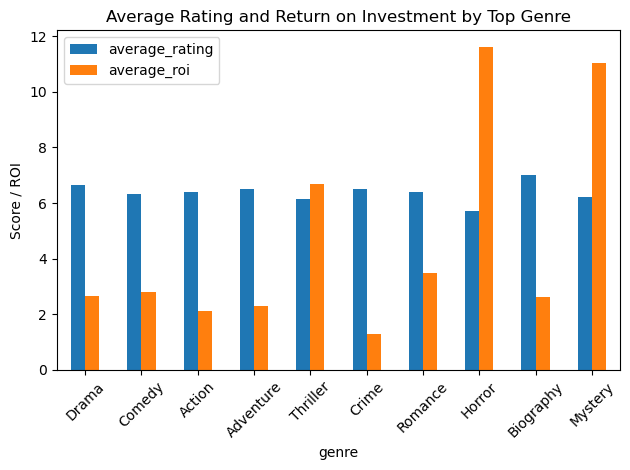

In [103]:
# Bar plot for visualizing average rating and Return on Investment (ROI)
performance_df.set_index('genre')[['average_rating', 'average_roi']].plot(kind='bar')
plt.title('Average Rating and Return on Investment by Top Genre')
plt.ylabel('Score / ROI')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


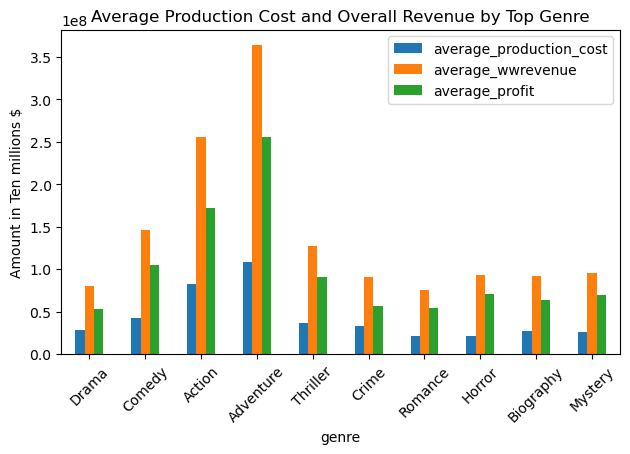

In [104]:
# Bar plot of production cost, revenue and profit
performance_df.set_index('genre')[['average_production_cost', 'average_wwrevenue','average_profit' ]].plot(kind='bar')
plt.title('Average Production Cost and Overall Revenue by Top Genre')
plt.ylabel('Amount in Ten millions $')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

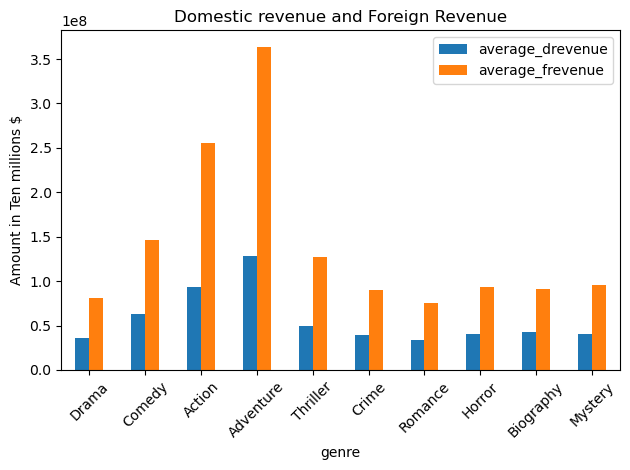

In [107]:
# Bar plot for visualizing average rating and Return on Investment (ROI)
performance_df.set_index('genre')[['average_drevenue', 'average_frevenue']].plot(kind='bar')
plt.title('Domestic revenue and Foreign Revenue')
plt.ylabel('Amount in Ten millions $')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()